In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
labor = pd.read_csv('../081/measurements.csv', sep='\t')

In [3]:
labor.head()
labor.replace('', np.nan, inplace=True)
labor = labor.dropna()

In [4]:
print('Počet záznamov: ', labor.shape[0])
print('Počet atribútov: ', labor.shape[1])
print('\nTypy atribútov:')
display(labor.dtypes)

Počet záznamov:  11406
Počet atribútov:  18

Typy atribútov:


latitude     float64
PM2.5        float64
NOx          float64
PM10         float64
C2H3NO5      float64
CH4          float64
longitude    float64
Pb           float64
TEMP         float64
NH3          float64
SO2          float64
O3           float64
CO           float64
PAHs         float64
H2CO         float64
PRES         float64
warning      float64
CFCs         float64
dtype: object

In [5]:
print('Merania pocet duplikatov', len(labor)-len(labor.drop_duplicates()))

Merania pocet duplikatov 168


Text(0.5, 0, 'Percentage')

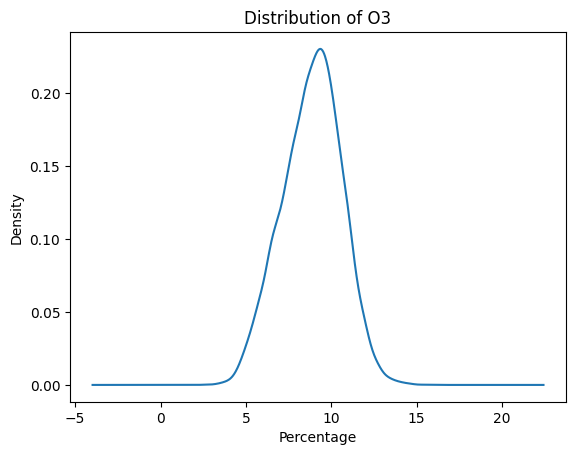

In [6]:
labor['O3'].plot(kind='kde')
plt.title('Distribution of O3')
plt.xlabel('Percentage')


Text(0.5, 0, 'Percentage')

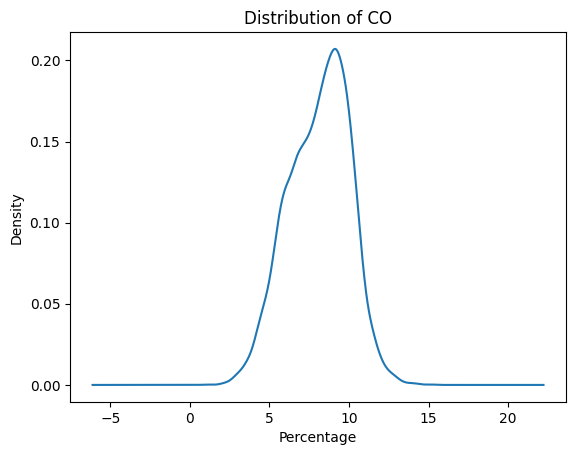

In [7]:
labor['CO'].plot(kind='kde')
plt.title('Distribution of CO')
plt.xlabel('Percentage')

In [8]:
labor_copy = labor.copy(deep=True)
labor_copy.drop(labor_copy.columns[0:9], axis=1, inplace=True)
labor_copy.drop(labor_copy.columns[4:9], axis=1, inplace=True)
#sns.pairplot(labor, hue="warning")

<AxesSubplot: >

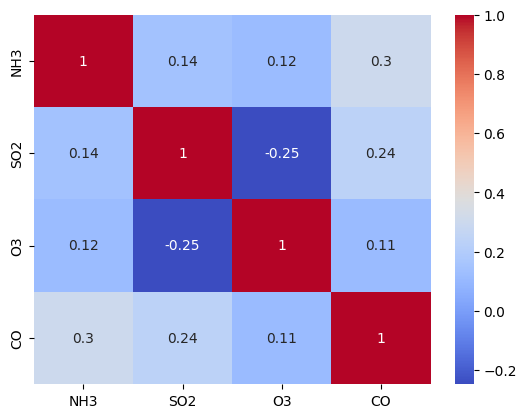

In [9]:
sns.heatmap(labor_copy.corr(), annot=True, cmap='coolwarm')

In [10]:
labor_stations = pd.read_csv('../081/stations.csv', sep='\t')
labor_stations.drop(labor_stations.columns[1], axis=1, inplace=True)
labor_stations.drop(labor_stations.columns[2:4], axis=1, inplace=True)
labor_stations.head()
#labor_stations.replace('', np.nan, inplace=True)
#labor_stations = labor_stations.dropna()

,latitude,longitude,location
0,-1.60000,103.61667,Asia/Jakarta
1,29.84576,-90.10674,America/Chicago
2,33.03699,-117.29198,America/Los_Angeles
3,31.84568,-102.36764,America/Chicago
4,16.06213,76.05860,Asia/Kolkata


In [11]:
print('Stanice pocet duplikatov', len(labor_stations)-len(labor_stations.drop_duplicates()))

Stanice pocet duplikatov 428


In [12]:
labor_stations = labor_stations.drop_duplicates()

In [13]:
print('Počet záznamov: ', labor_stations.shape[0])
print('Počet atribútov: ', labor_stations.shape[1])
print('\nTypy atribútov:')
display(labor_stations.dtypes)

Počet záznamov:  633
Počet atribútov:  3

Typy atribútov:


latitude     float64
longitude    float64
location      object
dtype: object

In [14]:
df = pd.merge(labor, labor_stations, how='inner', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])

In [15]:
df.head()
df.drop_duplicates()

,latitude,PM2.5,NOx,PM10,C2H3NO5,CH4,longitude,Pb,TEMP,NH3,SO2,O3,CO,PAHs,H2CO,PRES,warning,CFCs,location
0,37.71715,8.47714,9.21522,9.38738,1.51791,7.84989,-122.40433,59.51096,20.05101,10.43604,5.81201,7.77502,9.69678,8.62090,47.64810,1139.12673,0.0,74.87342,America/Los_Angeles
1,37.71715,7.36880,9.66741,8.19826,0.64236,8.48027,-122.40433,54.03980,21.55701,9.62838,7.97135,9.72566,5.83821,8.28391,64.99154,1115.19699,1.0,63.42154,America/Los_Angeles
2,37.71715,9.81855,9.66138,6.16989,0.23616,8.49506,-122.40433,47.32216,3.06998,6.38848,6.14333,9.73098,7.37730,5.98279,43.12537,1086.02547,1.0,71.61779,America/Los_Angeles
3,37.71715,8.76470,10.27526,7.10130,0.17080,7.35744,-122.40433,48.49527,10.04558,8.11869,6.74522,9.63330,4.89810,8.76285,43.67037,1168.02340,1.0,64.64020,America/Los_Angeles
4,37.71715,6.76710,9.95663,8.35517,0.75765,6.98671,-122.40433,52.91472,24.88676,8.87397,9.24788,8.40595,10.82485,7.88543,40.39068,1061.95581,1.0,70.46390,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401,44.92801,9.78318,9.74230,7.67035,0.36782,6.94297,4.89510,43.68240,11.48811,6.50060,6.63834,10.72246,5.77056,8.22359,31.65693,1192.48840,1.0,74.26772,Europe/Paris
11402,44.92801,10.03862,7.85019,2.61045,0.16818,7.93426,4.89510,42.37355,-4.79197,6.51674,7.03170,4.37153,9.76505,7.85202,32.10196,1130.15144,1.0,81.64000,Europe/Paris
11403,44.92801,9.53663,9.61895,8.89174,0.94656,7.79162,4.89510,39.72329,7.30387,6.95733,10.58370,7.47375,12.15236,8.80525,73.44011,1191.87826,0.0,63.83947,Europe/Paris
11404,44.92801,8.98586,8.92907,9.21569,1.45297,8.30146,4.89510,54.14633,16.43794,7.86831,7.67169,12.78567,7.00978,8.29119,60.99687,1080.62899,1.0,77.04895,Europe/Paris


In [16]:
print('Počet záznamov: ', df.shape[0])
print('Počet atribútov: ', df.shape[1])
print('\nTypy atribútov:')
display(df.dtypes)

Počet záznamov:  11406
Počet atribútov:  19

Typy atribútov:


latitude     float64
PM2.5        float64
NOx          float64
PM10         float64
C2H3NO5      float64
CH4          float64
longitude    float64
Pb           float64
TEMP         float64
NH3          float64
SO2          float64
O3           float64
CO           float64
PAHs         float64
H2CO         float64
PRES         float64
warning      float64
CFCs         float64
location      object
dtype: object

In [17]:
display(df)

,latitude,PM2.5,NOx,PM10,C2H3NO5,CH4,longitude,Pb,TEMP,NH3,SO2,O3,CO,PAHs,H2CO,PRES,warning,CFCs,location
0,37.71715,8.47714,9.21522,9.38738,1.51791,7.84989,-122.40433,59.51096,20.05101,10.43604,5.81201,7.77502,9.69678,8.62090,47.64810,1139.12673,0.0,74.87342,America/Los_Angeles
1,37.71715,7.36880,9.66741,8.19826,0.64236,8.48027,-122.40433,54.03980,21.55701,9.62838,7.97135,9.72566,5.83821,8.28391,64.99154,1115.19699,1.0,63.42154,America/Los_Angeles
2,37.71715,9.81855,9.66138,6.16989,0.23616,8.49506,-122.40433,47.32216,3.06998,6.38848,6.14333,9.73098,7.37730,5.98279,43.12537,1086.02547,1.0,71.61779,America/Los_Angeles
3,37.71715,8.76470,10.27526,7.10130,0.17080,7.35744,-122.40433,48.49527,10.04558,8.11869,6.74522,9.63330,4.89810,8.76285,43.67037,1168.02340,1.0,64.64020,America/Los_Angeles
4,37.71715,6.76710,9.95663,8.35517,0.75765,6.98671,-122.40433,52.91472,24.88676,8.87397,9.24788,8.40595,10.82485,7.88543,40.39068,1061.95581,1.0,70.46390,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401,44.92801,9.78318,9.74230,7.67035,0.36782,6.94297,4.89510,43.68240,11.48811,6.50060,6.63834,10.72246,5.77056,8.22359,31.65693,1192.48840,1.0,74.26772,Europe/Paris
11402,44.92801,10.03862,7.85019,2.61045,0.16818,7.93426,4.89510,42.37355,-4.79197,6.51674,7.03170,4.37153,9.76505,7.85202,32.10196,1130.15144,1.0,81.64000,Europe/Paris
11403,44.92801,9.53663,9.61895,8.89174,0.94656,7.79162,4.89510,39.72329,7.30387,6.95733,10.58370,7.47375,12.15236,8.80525,73.44011,1191.87826,0.0,63.83947,Europe/Paris
11404,44.92801,8.98586,8.92907,9.21569,1.45297,8.30146,4.89510,54.14633,16.43794,7.86831,7.67169,12.78567,7.00978,8.29119,60.99687,1080.62899,1.0,77.04895,Europe/Paris
